              Anova
    F Value Num DF  Den DF Pr > F
---------------------------------
Oil  0.5679 3.0000 12.0000 0.6466

Oil 1: W-stat=0.860, p-value=0.228
Oil 2: W-stat=0.814, p-value=0.105
Oil 3: W-stat=0.933, p-value=0.616
Oil 4: W-stat=0.833, p-value=0.147
Mauchly's test for Sphericity:
SpherResults(spher=True, W=0.28740984224030364, chi2=3.3941920525834335, dof=5, pval=0.6589629981191091)


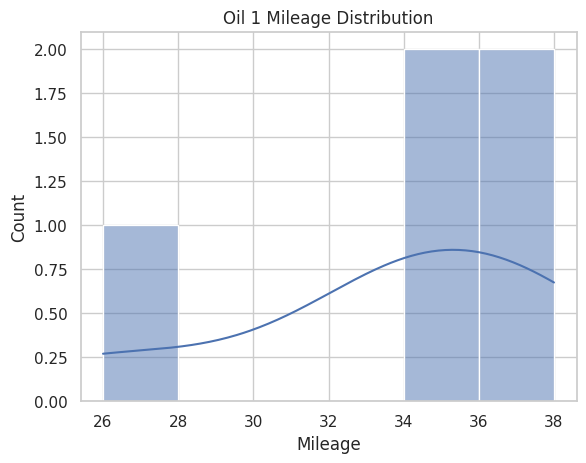

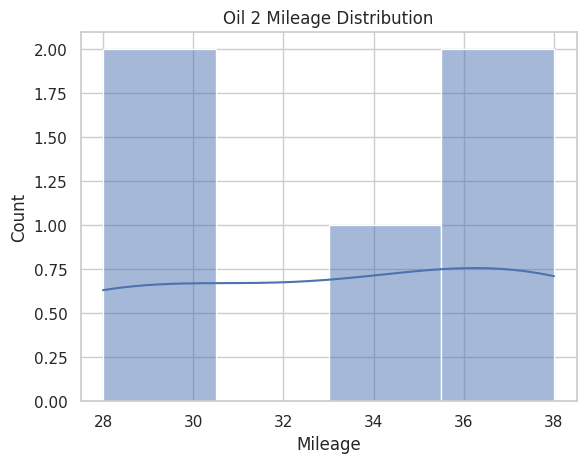

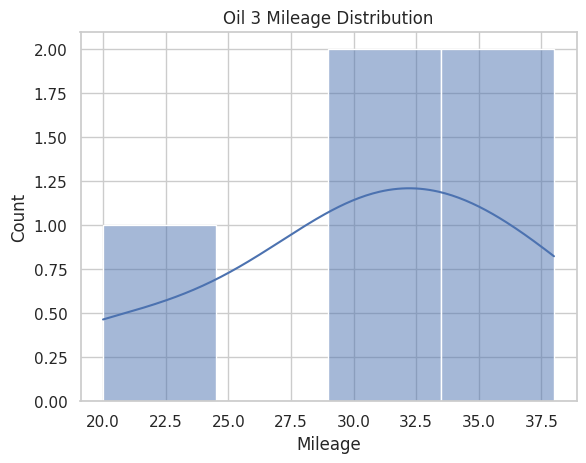

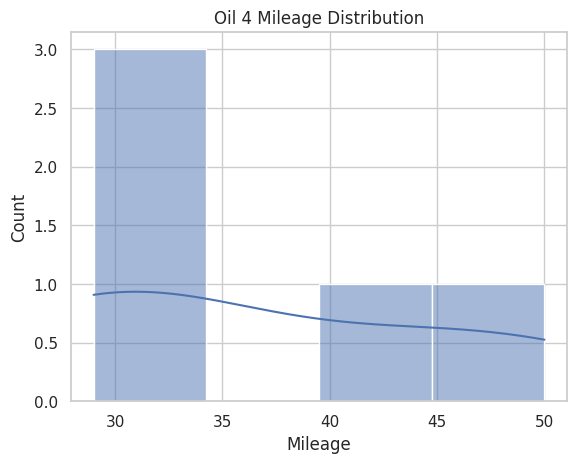

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     -0.4 0.9997 -12.6557 11.8557  False
     1      3     -3.2 0.8766 -15.4557  9.0557  False
     1      4      3.2 0.8766  -9.0557 15.4557  False
     2      3     -2.8 0.9127 -15.0557  9.4557  False
     2      4      3.6 0.8345  -8.6557 15.8557  False
     3      4      6.4 0.4636  -5.8557 18.6557  False
-----------------------------------------------------


In [4]:

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg

# Create the data
dataframe = pd.DataFrame({
    'Cars': np.repeat([1, 2, 3, 4, 5], 4),
    'Oil': np.tile([1, 2, 3, 4], 5),
    'Mileage': [36, 38, 30, 29,
                34, 38, 30, 29,
                34, 28, 38, 32,
                38, 34, 20, 44,
                26, 28, 34, 50]
})

# Conduct Repeated Measures ANOVA
aovrm = AnovaRM(dataframe, 'Mileage', 'Cars', within=['Oil'])
res = aovrm.fit()

# Output the results
print(res)

# -----------------------
# Check Assumptions
# -----------------------

# 1. Check Normality for each oil type using Shapiro-Wilk test
for oil in dataframe['Oil'].unique():
    stat, p = shapiro(dataframe[dataframe['Oil'] == oil]['Mileage'])
    print(f'Oil {oil}: W-stat={stat:.3f}, p-value={p:.3f}')

# 2. Sphericity: Mauchly's Test (using pingouin)
mauchly_test = pg.sphericity(dataframe, dv='Mileage', within='Oil', subject='Cars')
print("Mauchly's test for Sphericity:")
print(mauchly_test)

# Plot Q-Q plots to check normality visually
sns.set(style="whitegrid")
for oil in dataframe['Oil'].unique():
    sns.histplot(dataframe[dataframe['Oil'] == oil]['Mileage'], kde=True)
    plt.title(f'Oil {oil} Mileage Distribution')
    plt.show()

# Tukey HSD Post-hoc Test
tukey = pairwise_tukeyhsd(dataframe['Mileage'], dataframe['Oil'])
print(tukey)
